# Spectrograms

## Install and import packages

In [ ]:
#!pip install librosa
#!pip install numpy
#!pip install matplotlib
#!pip install IPython
#!pip install glob
#!pip install torch

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

## Setup

In [6]:
plt.rcParams.update({'font.size': 16, 'axes.grid': True})

In [7]:
SR = 22050  # sample rate of audio
wide = (18, 3)  # figure size
big = (18, 8)  # figure size

## Get the list of audio file paths

In [8]:
# run this cell after uploading data
import glob
# file_paths = glob.glob("/home/julian/Downloads/workbook2_data/*.wav")
file_paths = glob.glob("/data/*.wav")
if not len(file_paths):
    print("Make sure to adjust your file paths!")

Make sure to adjust your file paths!


In [12]:
# ??? what's going on lol
print(file_paths)
%pwd

[]


'/content'

In [13]:
%ls

data/  sample_data/


In [15]:
%ls data/

'A dark pop track with haunting synths, deep bass, and mysterious lyrics about secrets in the shadows._0.wav'
'A delicate classical waltz with lilting strings, a gentle flute melody, and a romantic ballroom atmosphere._1.wav'
'A dreamy electro-pop song with shimmering arpeggios, ethereal vocals, and a theme of exploring the cosmos._0.wav'
'A fiery classical concerto with virtuosic violin runs, powerful orchestral swells, and a passionate, fiery spirit_1.wav'
'A funky pop track with groovy basslines, brass stabs, and a retro 80s vibe about dancing all night._0.wav'
'A futuristic pop hit with glitchy effects, robotic vocals, and a driving rhythm about life in a digital world._0.wav'
'A grand orchestral piece with soaring violins, triumphant brass, and thunderous timpani evoking a heroic victory._1.wav'
'A high-energy pop banger with pounding beats, electric guitar riffs, and a rebellious attitude about breaking free._0.wav'
'A lively classical scherzo with playful woodwinds, skipping str

In [17]:
# oh I see lol
import glob
file_paths = glob.glob("data/*.wav")
if not len(file_paths):
    print("Make sure to adjust your file paths!")

## Load an audio and plot waveforms

src.shape=(110250,), sr=22050


(-1.0, 1.0)

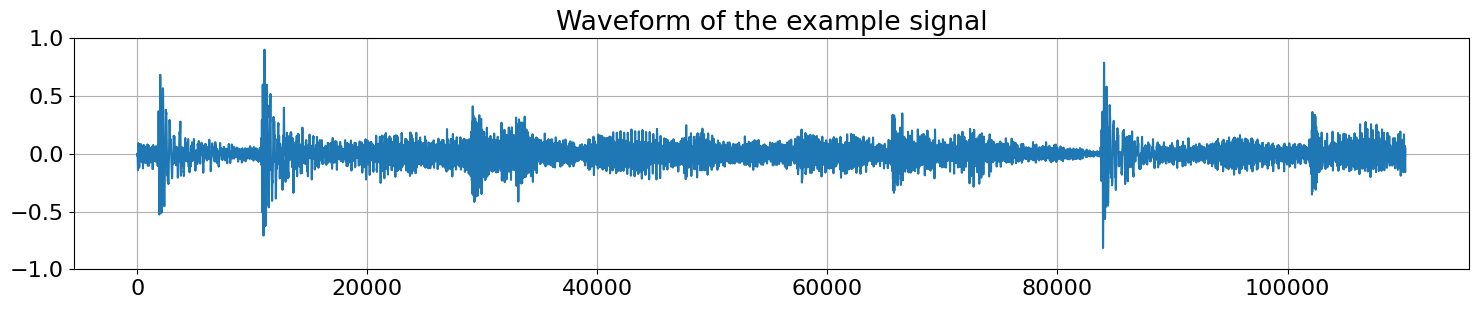

In [18]:
src, sr = librosa.load(file_paths[0], sr=SR, mono=True, duration=5.0) # Just the first 5 seconds, in mono

print(f'{src.shape=}, {sr=}')

plt.figure(figsize=wide) # plot using matplotlib
plt.title('Waveform of the example signal')
plt.plot(src)
plt.ylim([-1, 1])

In [19]:
ipd.Audio(src, rate=sr)

(-1.0, 1.0)

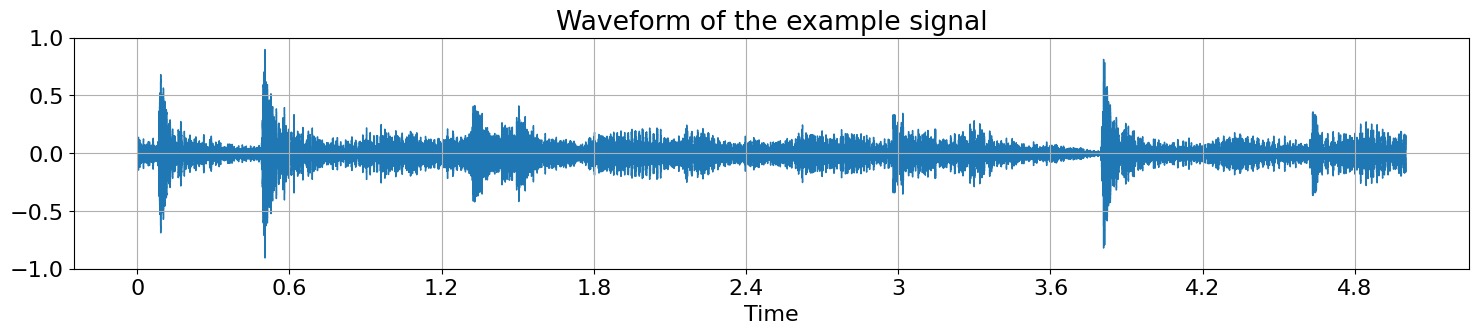

In [20]:
plt.figure(figsize=wide) # plot using librosa
plt.title('Waveform of the example signal')
librosa.display.waveshow(src, sr=22050)
plt.ylim([-1, 1])

## Plot zoomed-in waveform

(-0.5, 0.5)

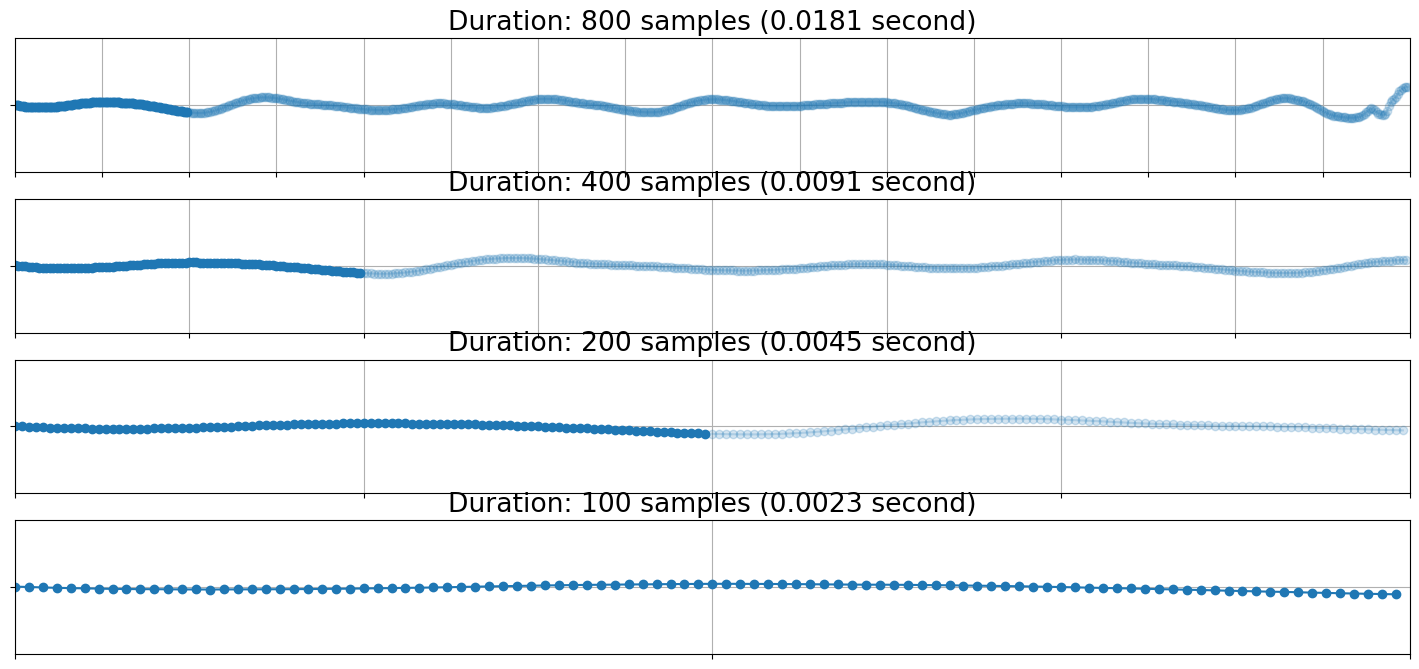

In [21]:
plt.figure(figsize=big)
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o');
plt.plot(np.arange(100, 800), src[10100:10000 + 800], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 800 samples ({800/44100:0.4f} second)')
plt.xlim([0, 800])
plt.xticks(range(0, 801, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 2)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o');
plt.plot(np.arange(100, 400), src[10100:10000 + 400], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 400 samples ({400/44100:0.4f} second)')
plt.xlim([0, 400])
plt.xticks(range(0, 401, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 3)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o');
plt.plot(np.arange(100, 200), src[10100:10000 + 200], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 200 samples ({200/44100:0.4f} second)')
plt.xlim([0, 200])
plt.xticks(range(0, 201, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 4)
plt.plot(src[10000:10000 + 100], marker='o');plt.yticks([0], [''])
plt.title(f'Duration: 100 samples ({100/44100:0.4f} second)')
plt.xlim([0, 100])
plt.xticks(range(0, 101, 50), [])
plt.ylim([-0.5, 0.5])

## STFT

In [22]:
n_fft = 512 # STFT parameter; higher n_fft = higher frequency resolution
hop_length = n_fft // 4 # STFT parameter; smaller hop_length = higher time resolution
stft_complex = librosa.stft(y=src, n_fft=n_fft, hop_length=hop_length)

print(f"{src.shape=}\n{stft_complex.dtype=}\n{stft_complex.shape=}\n{stft_complex[3, 3]=}\n")

src.shape=(110250,)
stft_complex.dtype=dtype('complex64')
stft_complex.shape=(257, 862)
stft_complex[3, 3]=np.complex64(1.6951344+3.5879123j)



Text(0.5, 1.0, 'Duration: 3000 samples (0.0680 second)')

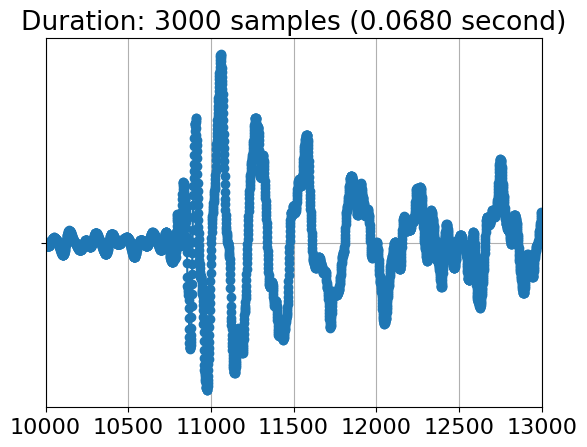

In [23]:
plt.plot(range(10000,13000),src[10000:13000], marker='o')
plt.yticks([0], [''])
plt.xlim([10000,13000])
plt.title(f'Duration: 3000 samples ({3000/44100:0.4f} second)')

## Magnitude-STFT

stft.dtype=dtype('float32')
stft.shape=(257, 862)
stft[3, 3]=np.float32(3.9681978)



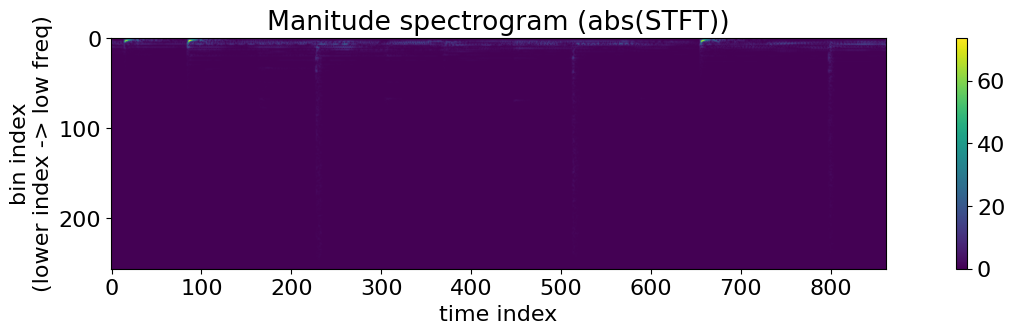

In [24]:
stft = np.abs(stft_complex)
print(f"{stft.dtype=}\n{stft.shape=}\n{stft[3, 3]=}\n")

plt.figure(figsize=wide)
img = plt.imshow(stft)
plt.colorbar(img)
plt.ylabel('bin index\n(lower index -> low freq)');plt.xlabel('time index')
plt.title('Manitude spectrogram (abs(STFT))');plt.grid(False);

## Time frequency distribution

Text(0.5, 1.0, 'Frequency magnitude (linear scale)')

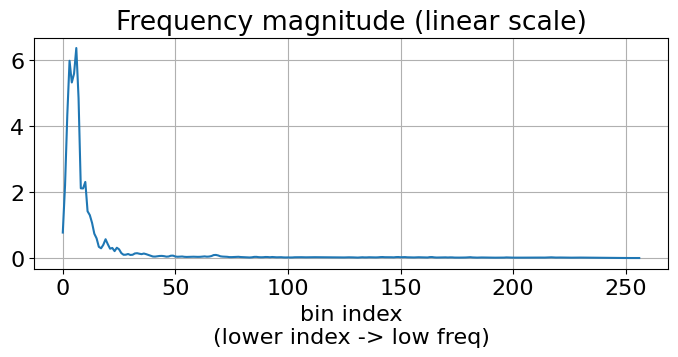

In [25]:
plt.figure(figsize=wide); plt.subplot(1, 2, 1)
stft_freq_distritubion = np.mean(stft, axis=1) # axis=1 is the time axis.
plt.plot(stft_freq_distritubion)
plt.xlabel('bin index\n(lower index -> low freq)')
plt.title('Frequency magnitude (linear scale)')

## Log-magnitude STFT

log_stft.dtype=dtype('float32')
log_stft.shape=(257, 862)


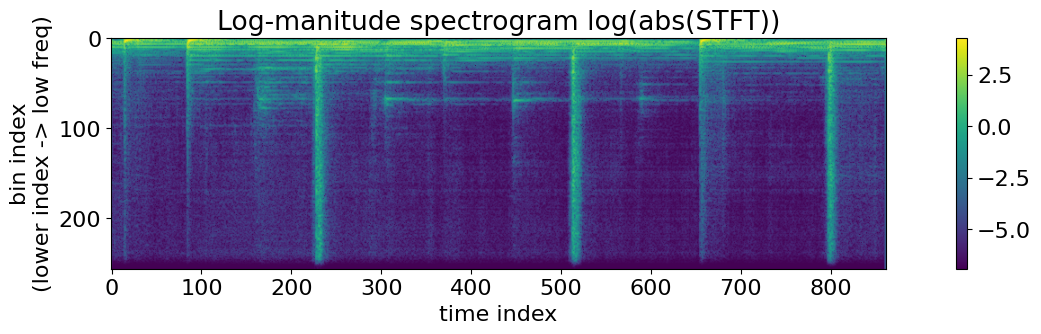

In [26]:
eps = 0.001
log_stft = np.log(np.abs(stft_complex) + eps)
print(f"{log_stft.dtype=}\n{log_stft.shape=}")

plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(lower index -> low freq)');plt.xlabel('time index')
plt.title('Log-manitude spectrogram log(abs(STFT))');plt.grid(False);

ipd.Audio(src, rate=sr) # load a NumPy array

log_stft.dtype=dtype('float32')
log_stft.shape=(257, 862)



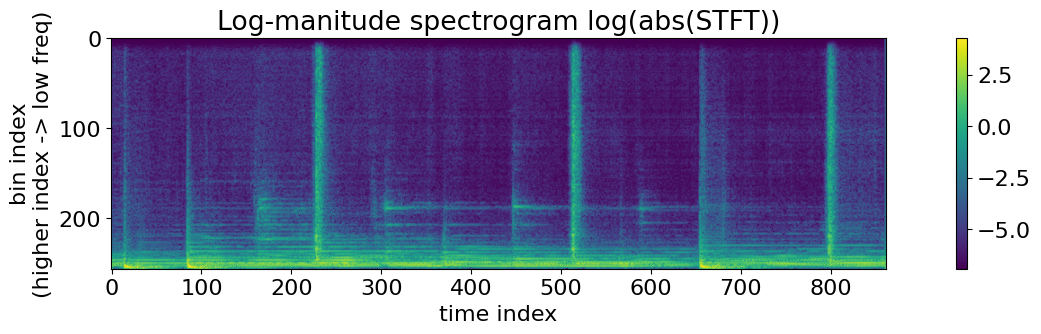

In [27]:
eps = 0.001
log_stft = np.log(np.abs(stft_complex) + eps)
log_stft = np.flipud(log_stft)  # <-- Here! The rest of the code is hidden.
print(f"{log_stft.dtype=}\n{log_stft.shape=}\n")

plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(higher index -> low freq)');plt.xlabel('time index')
plt.title('Log-manitude spectrogram log(abs(STFT))');plt.grid(False);

## Change units of x and y axis

Text(0.5, 1.0, 'decibel scaled STFT, i.e., log(abs(stft))')

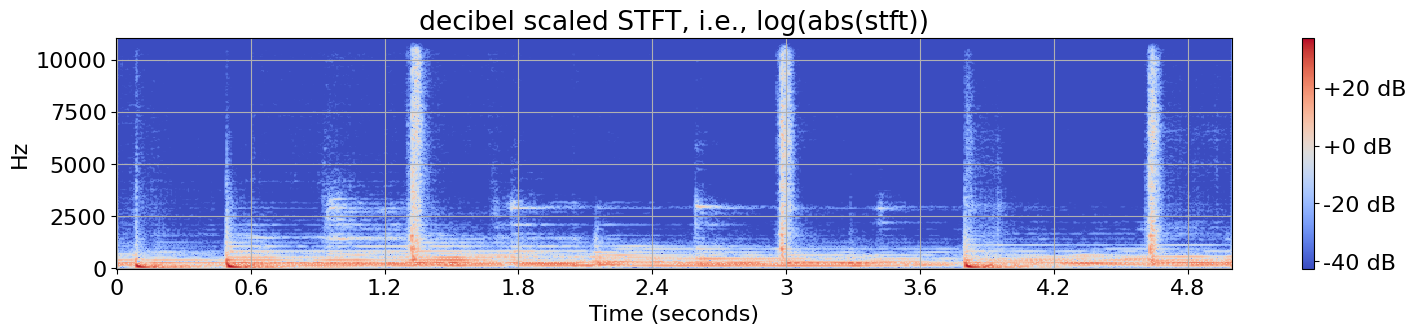

In [28]:
plt.figure(figsize=wide)
img = librosa.display.specshow(librosa.amplitude_to_db(stft), sr=SR, x_axis='s', y_axis='linear', hop_length=hop_length)
plt.colorbar(img, format="%+2.f dB")
plt.title('decibel scaled STFT, i.e., log(abs(stft))')

## Melspectrogram

In [29]:
log_melgram = librosa.power_to_db(
    np.abs(
        librosa.feature.melspectrogram(y=src, sr=SR, n_fft=n_fft, hop_length=hop_length, power=2.0,n_mels=128)
    )
)
print(log_melgram.shape, stft.shape) # 257 frequency bins became 128 mel bins.

(128, 862) (257, 862)


Text(0.5, 0, 'time [index]')

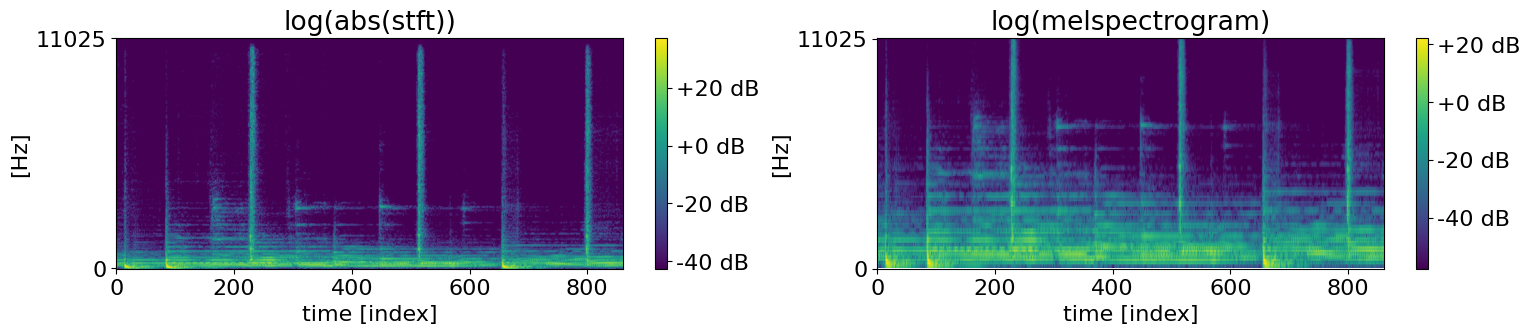

In [30]:
plt.figure(figsize=(wide))
plt.subplot(1, 2, 1)
img = plt.imshow(np.flipud(librosa.amplitude_to_db(stft)),aspect='auto')
plt.colorbar(img, format="%+2.f dB")
plt.title('log(abs(stft))'); plt.grid(False);
plt.yticks([0, n_fft//2], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time [index]')

plt.subplot(1, 2, 2)
img = plt.imshow(np.flipud(log_melgram),aspect='auto')
plt.colorbar(img, format="%+2.f dB")
plt.title('log(melspectrogram)');  plt.grid(False);plt.yticks([]);
plt.yticks([0, 128], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time [index]')

## Constant-Q Transform

In [31]:
log_cqt = librosa.amplitude_to_db(
    np.abs(
        librosa.cqt(y=src, sr=SR, hop_length=hop_length, n_bins=24*7, bins_per_octave=24, fmin=librosa.note_to_hz('C1'))
    )
)

Text(0.5, 1.0, 'log(cqt)')

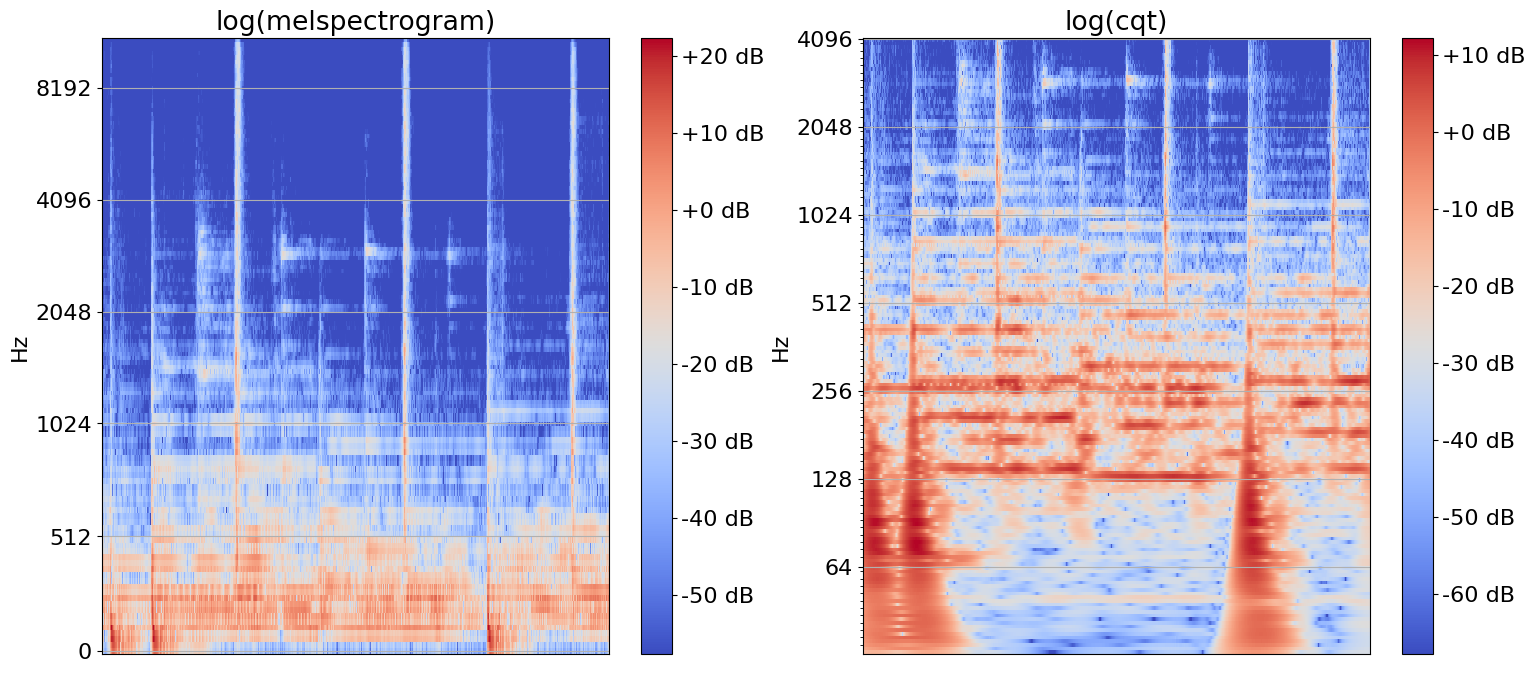

In [32]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
img = librosa.display.specshow(log_melgram, y_axis='mel', sr=SR, hop_length=hop_length)
plt.colorbar(img, format="%+2.f dB")
plt.title('log(melspectrogram)')

plt.subplot(1, 2, 2)
img = librosa.display.specshow(log_cqt, y_axis='cqt_hz', sr=SR, hop_length=hop_length, bins_per_octave=24)
plt.colorbar(img, format="%+2.f dB")
plt.title('log(cqt)')

## MFCCs

In [33]:
mfcc_13 = librosa.feature.mfcc(y=src, sr=sr, n_mfcc=13)
mfcc_20 = librosa.feature.mfcc(y=src, sr=sr, n_mfcc=20)
mfcc_40 = librosa.feature.mfcc(y=src, sr=sr, n_mfcc=40)

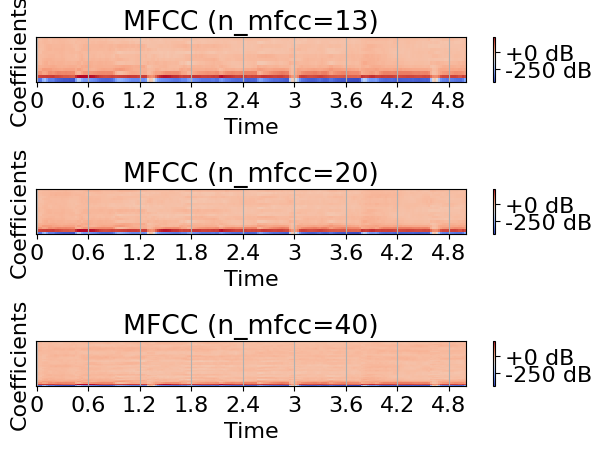

In [34]:
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc_13, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (n_mfcc=13)')
plt.xlabel('Time')
plt.ylabel('Coefficients')

plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_20, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (n_mfcc=20)')
plt.xlabel('Time')
plt.ylabel('Coefficients')

plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_40, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (n_mfcc=40)')
plt.xlabel('Time')
plt.ylabel('Coefficients')

plt.tight_layout()
plt.show()

# ML pipeline

## Install and import packages

In [ ]:
#!pip install torch
#!pip install tqdm

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import librosa
import numpy as np
from tqdm import tqdm

## Construct a PyTorch Dataset class

In [36]:
class MelSpectrogramDataset(Dataset):
    def __init__(self, audio_files, sr=16000, n_mels=128, hop_length=512):
        self.audio_files = audio_files
        self.sr = sr
        self.n_mels = n_mels
        self.hop_length = hop_length
        self.fixed_length = int((30 * sr) / hop_length) + 1

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio_path = self.audio_files[idx]
        y, sr = librosa.load(audio_path, sr=self.sr, duration=30.0)

        mel_spec = librosa.feature.melspectrogram(y=y, sr=self.sr, n_mels=self.n_mels, hop_length=self.hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        if mel_spec_db.shape[1] != self.fixed_length:
            mel_spec_db = mel_spec_db[:, :self.fixed_length]

        mel_tensor = torch.FloatTensor(mel_spec_db).unsqueeze(0)
        label = int(audio_path.split(".wav")[0].split("_")[-1]) #When the file name ends with 0.wav, it's pop music. When the file name ends with 1.wav, it's a classical music
        label = torch.LongTensor([label])

        return mel_tensor, label

## Build a PyTorch module that classifies the genre of audio based on mel-spectrograms

In [37]:
class MelSpectrogramClassifier(nn.Module):
    def __init__(self, input_channels=1, n_mels=128, fixed_length=938, num_classes=2):
        super(MelSpectrogramClassifier, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)#2D convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)#2D convolutional layer

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)#Max Pooling

        self.relu = nn.ReLU() #ReLU activation function

        self.fc1 = nn.Linear(32 * (n_mels // 4)  * (fixed_length // 4), 128) #A fully-connected layer where the input dimension is `32 * n_mels * (fixed_length // 4)` and the output dimension is `128``
        self.fc2 = nn.Linear(128, num_classes)#A fully-connected layer where the input dimension is `128` and the output dimension is `num_classes`

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.transpose(2, 3)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        # Flatten
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

## Define datasets and dataloaders

In [38]:
train_dataset = MelSpectrogramDataset(file_paths[:16],  sr=16000, n_mels=128, hop_length=512)
val_dataset = MelSpectrogramDataset(file_paths[16:18],  sr=16000, n_mels=128, hop_length=512)
test_dataset = MelSpectrogramDataset(file_paths[18:], sr=16000, n_mels=128, hop_length=512)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [39]:
learning_rate = 0.001

## Train, validate, and test your model

In [40]:
model = MelSpectrogramClassifier(input_channels=1, n_mels=128, fixed_length=938, num_classes=2) #Define your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Define your device
model = model.to(device) #Move your model to the device

criterion = nn.CrossEntropyLoss() #Define criterion
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #Define your optimizer

best_val_loss = float('inf')
best_model_state = None

#TRAIN
for epoch in range(10): #10 epochs
    model.train()
    train_loss = 0.0
    for mel_spec, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{10} (Train)"):
        mel_spec = mel_spec.to(device)
        labels = labels.squeeze(1).to(device)
        outputs = model(mel_spec)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    #Validate
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for mel_spec, labels in val_loader:
            mel_spec = mel_spec.to(device)
            labels = labels.squeeze(1).to(device)

            outputs = model(mel_spec)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_avg_loss = running_loss / len(val_loader)
    val_accuracy = correct / total

    print(f"epoch [{epoch+1}/{10}]")
    print(f"training loss: {avg_train_loss:.4f}")
    print(f"validation loss: {val_avg_loss:.4f}, validation accuracy: {val_accuracy:.2f}")


    if val_avg_loss < best_val_loss:
        best_val_loss = val_avg_loss
        best_model_state = model.state_dict()
        torch.save(model.state_dict(), "best_mel_spectrogram_classifier.pth")

model.load_state_dict(best_model_state)

#Test (Evaluation)
model.eval()
running_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for mel_spec, labels in test_loader:
        mel_spec = mel_spec.to(device)
        labels = labels.squeeze(1).to(device)

        outputs = model(mel_spec)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(test_loader)
        accuracy = correct / total

Epoch 1/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]


epoch [1/10]
training loss: 355.1218
validation loss: 17.1970, validation accuracy: 0.50


Epoch 2/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]


epoch [2/10]
training loss: 4.8893
validation loss: 0.2565, validation accuracy: 1.00


Epoch 3/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


epoch [3/10]
training loss: 0.5469
validation loss: 0.7013, validation accuracy: 0.50


Epoch 4/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]


epoch [4/10]
training loss: 0.3447
validation loss: 0.9124, validation accuracy: 0.50


Epoch 5/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


epoch [5/10]
training loss: 0.0356
validation loss: 0.1147, validation accuracy: 1.00


Epoch 6/10 (Train): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]


epoch [6/10]
training loss: 0.0102
validation loss: 0.0300, validation accuracy: 1.00


Epoch 7/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


epoch [7/10]
training loss: 0.0000
validation loss: 2.1261, validation accuracy: 0.50


Epoch 8/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]


epoch [8/10]
training loss: 0.0003
validation loss: 2.2646, validation accuracy: 0.50


Epoch 9/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


epoch [9/10]
training loss: 0.0214
validation loss: 0.1572, validation accuracy: 1.00


Epoch 10/10 (Train): 100%|██████████| 16/16 [00:12<00:00,  1.32it/s]


epoch [10/10]
training loss: 0.0019
validation loss: 1.8987, validation accuracy: 0.50


In [41]:
print(f"test accuracy: {accuracy:.2f}")

test accuracy: 0.50
